<H1 align="center"> Apple Stock Price Prediction using LSTM </H1>

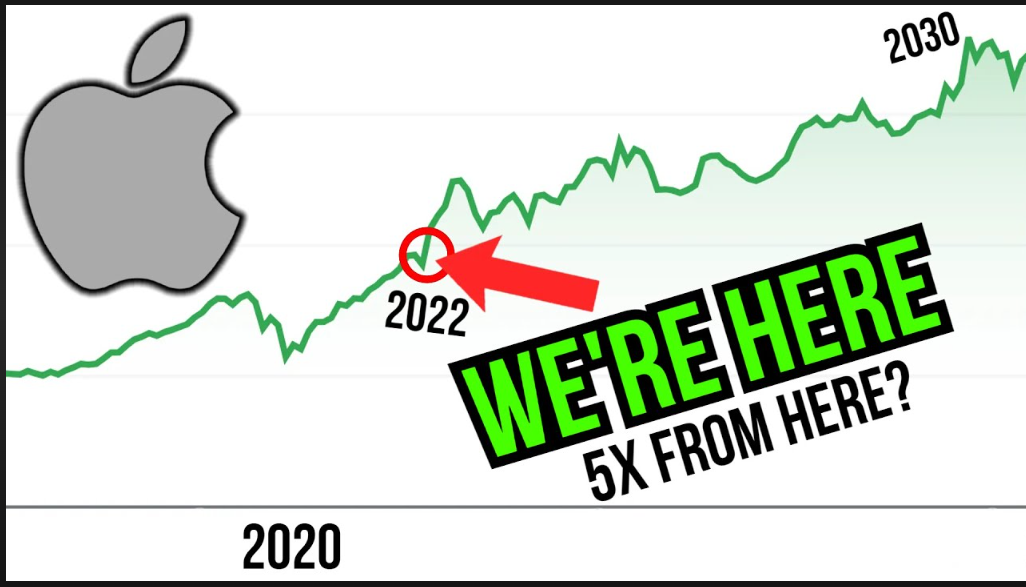


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras 
from tensorflow.keras.callbacks import EarlyStopping

<H1 align="center"> Apple Stock Price Load Dataset</H1>

In [96]:
df=pd.read_csv('AAPL.csv')

In [98]:
len(df)

10468

<H1 align="left"> Change Date DataType</H1>

In [102]:
df['Date']=pd.to_datetime(df['Date'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [106]:
df.set_index(df['Date'],inplace=True)

In [108]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2002-03-06,2002-03-06,0.419286,0.434643,0.409464,0.429821,0.367505,226206400
1992-01-22,1992-01-22,0.549107,0.569196,0.546875,0.566964,0.462844,183680000
1982-06-10,1982-06-10,0.057478,0.058036,0.057478,0.057478,0.044863,34406400
2021-02-09,2021-02-09,136.619995,137.880005,135.850006,136.009995,135.008041,76774200
1995-10-20,1995-10-20,0.314732,0.314732,0.309152,0.313616,0.267314,386332800


In [111]:
df=df.drop(columns='Date')

In [113]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-18,0.388929,0.406786,0.364643,0.371250,0.317425,1137012800
1984-03-15,0.118862,0.120536,0.117746,0.119420,0.093210,55283200
2000-03-23,1.267857,1.342634,1.250000,1.261719,1.078792,562564800
2000-05-25,0.790179,0.827288,0.767857,0.779157,0.666193,406750400
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139954,100805600


In [115]:
df.sort_index(inplace=True)

In [117]:
len(df)

10468

In [119]:
print(np.isinf(df).sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<H1 align="center"> Applied Log Transformation on Volumes</H1>

In [122]:
df['Volume']=np.log(df['Volume'])

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [124]:
df.sort_index()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,19.966185
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,18.985340
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,18.476380
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,18.274980
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,18.112110
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,18.621228
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,18.255621
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,18.332210


In [126]:
len(df)

10468

In [128]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [130]:
df.sample(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-03-17,3.401429,3.560357,3.395357,3.559286,3.043253,20.483289
1989-01-18,0.363839,0.367188,0.352679,0.354911,0.280769,20.005678
1997-05-23,0.148438,0.151786,0.148438,0.150670,0.128826,18.020681


<H1 align="center"> Standardization using Min Max Scaller</H1>

In [133]:
import numpy as np

# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Option 1: Drop rows with NaN values
df_cleaned = df.dropna()

# Option 2: Fill NaN values with mean of each column (or any other strategy)
df_cleaned = df.fillna(df.mean())

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_cleaned)


In [135]:
dataset=pd.DataFrame(scaled_values,columns=df.columns)

In [137]:
dataset=dataset.set_index(df.index)

In [139]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.678288
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.564020
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.504727
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.481264
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.462289
...,...,...,...,...,...,...
2022-06-13,0.727462,0.738969,0.733737,0.724501,0.726507,0.521601
2022-06-14,0.728886,0.731806,0.733960,0.729337,0.731356,0.479008
2022-06-15,0.735240,0.750670,0.737758,0.744011,0.746069,0.487931


<H1 align="center"> Visualzation of Time Series Analysis</H1>

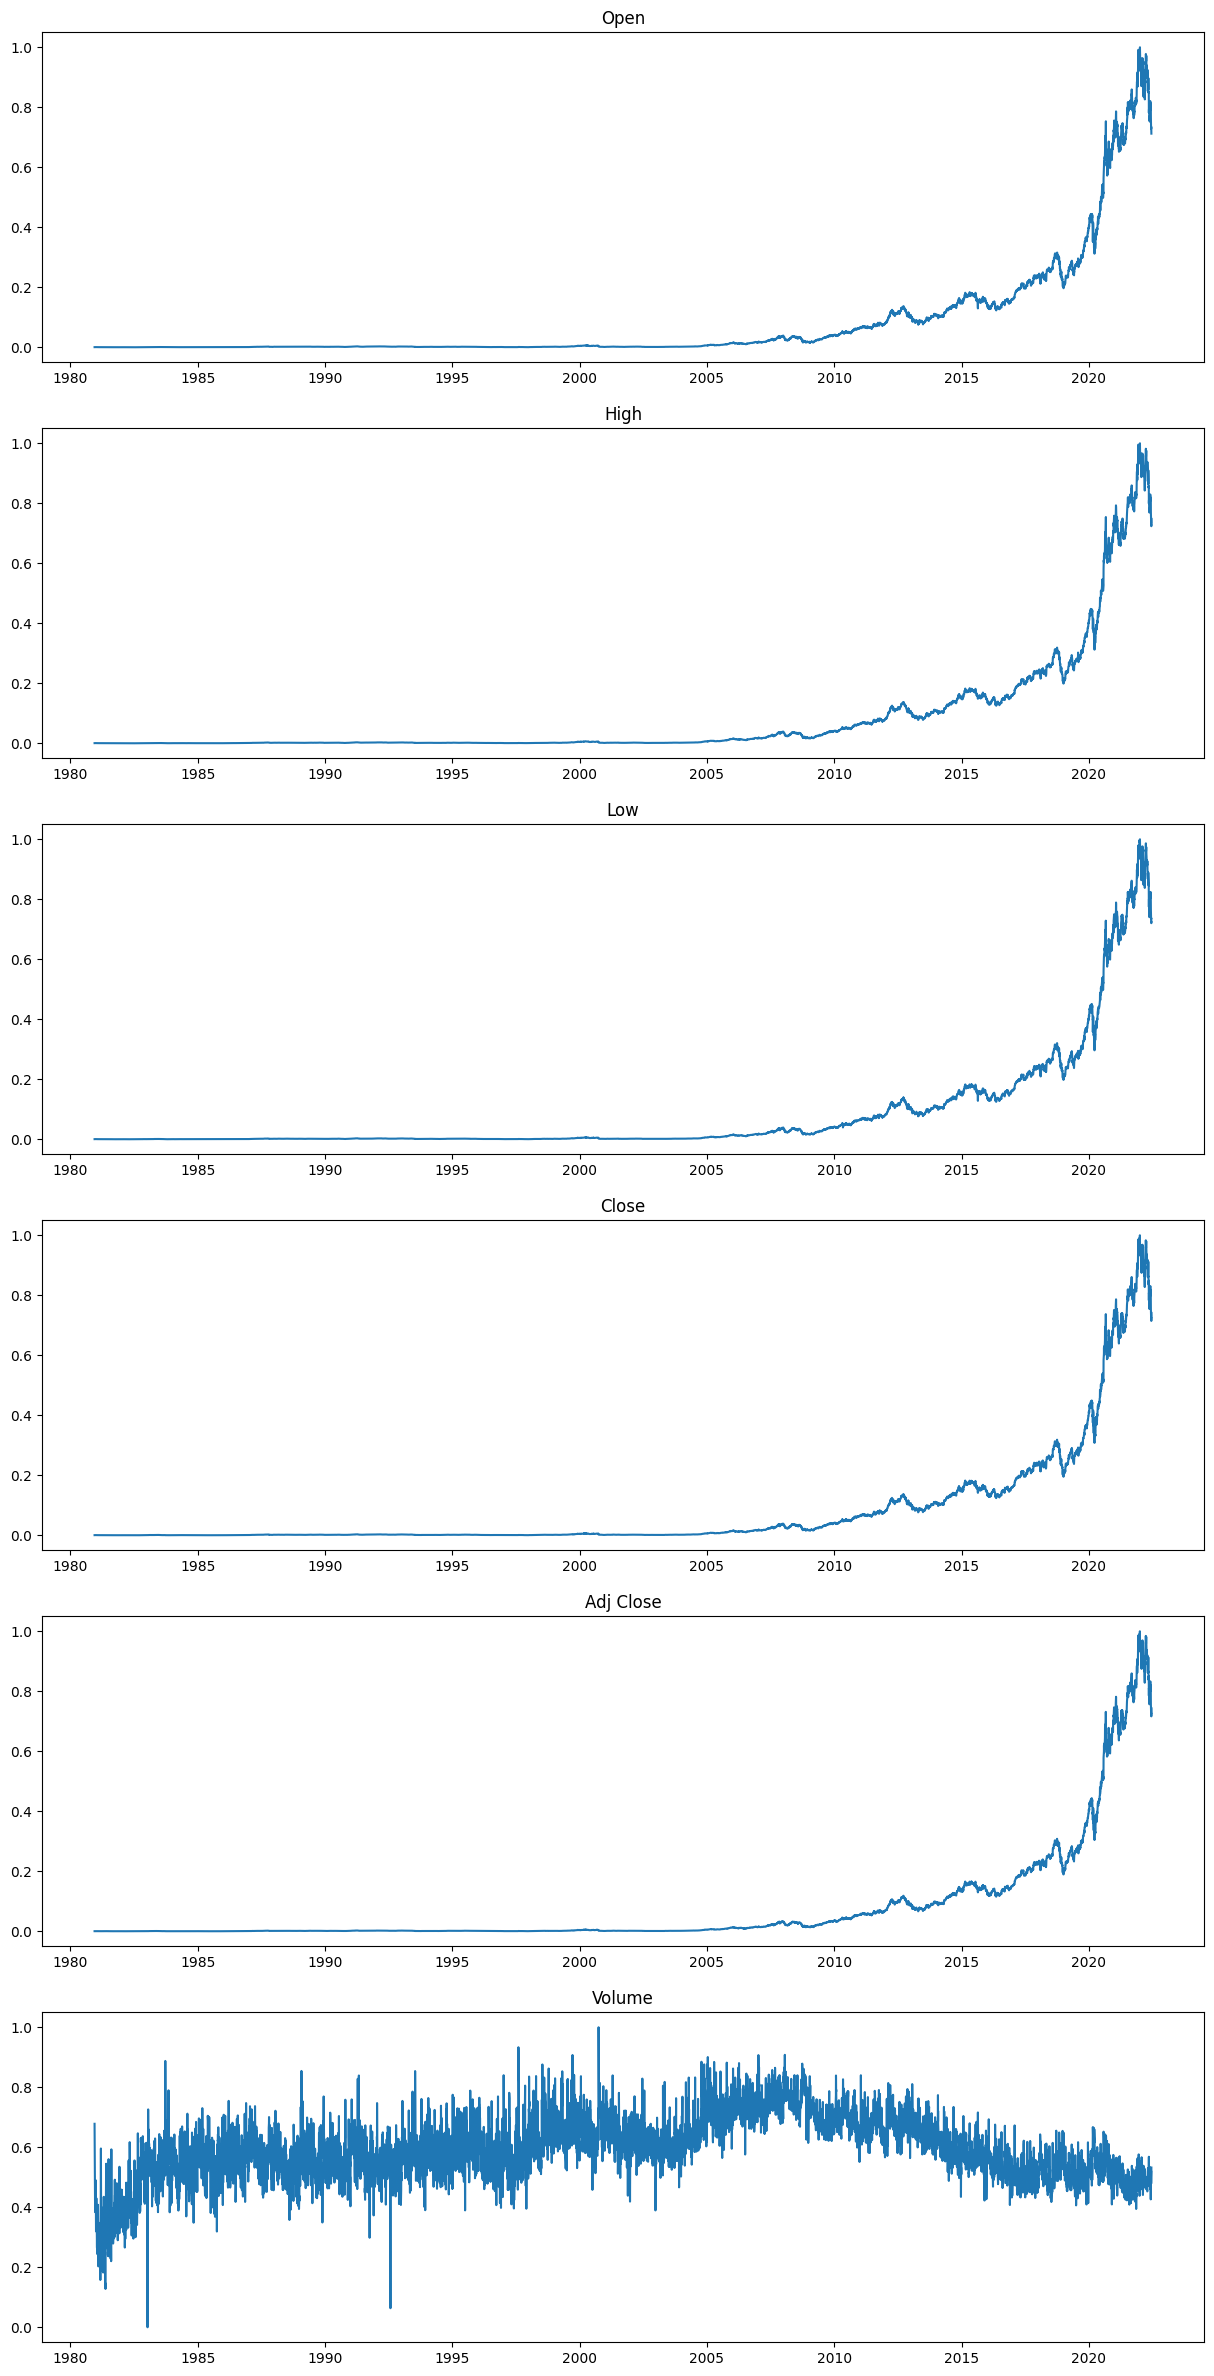

In [142]:
plt.rcParams['figure.figsize']=(15,30)
figure,axis=plt.subplots(6)
for axes,cols in zip(axis,dataset.columns):
    axes.plot(dataset[cols])
    axes.set_title(cols)

# 4. Create the Sliding Window Sequences

In [144]:
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(dataset, window_size)

In [145]:
X.shape, y.shape

((10408, 60, 6), (10408, 6))

# Train Test Split for Model Training

In [147]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8326, 60, 6), (8326, 6), (2082, 60, 6), (2082, 6))

In [148]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(60, 6, 6)

In [149]:
(X_train.shape[1], X_train.shape[2])

(60, 6)

# Train LSTM Nural Network Model for Time Series Analysis

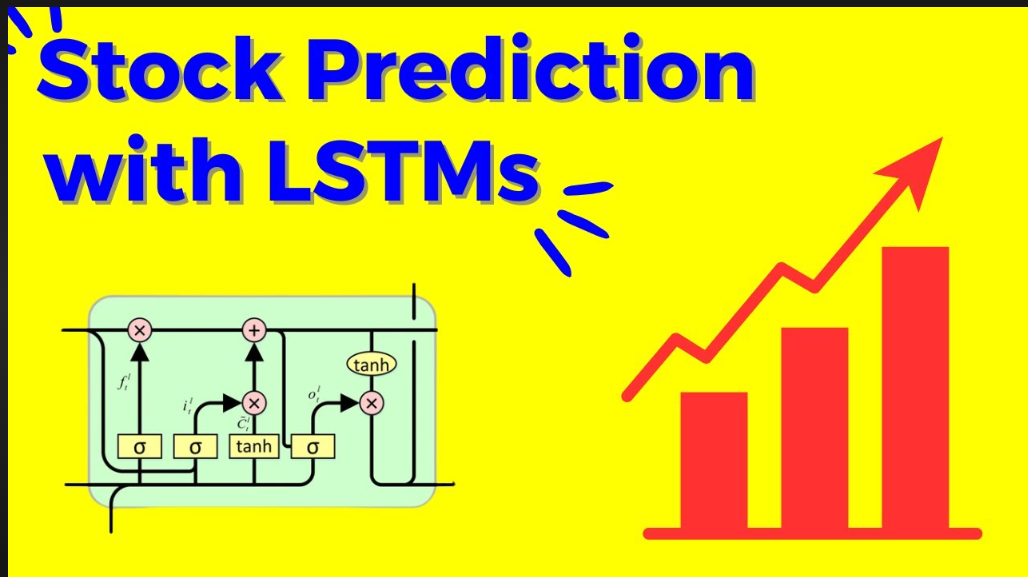

In [152]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# compilation


In [153]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

# Early stopping condition


In [154]:
early_stopping=EarlyStopping()

#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [155]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 102s 43ms/step - RootMeanSquaredError: 0.0826 - loss: 0.0073 - val_RootMeanSquaredError: 0.0293 - val_loss: 8.5932e-04
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 135s 40ms/step - RootMeanSquaredError: 0.0458 - loss: 0.0021 - val_RootMeanSquaredError: 0.0401 - val_loss: 0.0016
Epoch 3/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 89s 40ms/step - RootMeanSquaredError: 0.0411 - loss: 0.0017 - val_RootMeanSquaredError: 0.0280 - val_loss: 7.8483e-04
Epoch 4/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 148s 43ms/step - RootMeanSquaredError: 0.0385 - loss: 0.0015 - val_RootMeanSquaredError: 0.0259 - val_loss: 6.6943e-04
Epoch 5/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 89s 40ms/step - RootMeanSquaredError: 0.0374 - loss: 0.0014 - val_RootMeanSquaredError: 0.0265 - val_loss: 7.0307e-04
Epoch 6/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 90s 40ms/step - RootMeanSquaredError: 0.0353 - loss: 0.0013 - val_RootMeanSquaredError: 0.0227 - val_loss: 5.1514e-04
Epoch 7/100
2220/2220 ━━━━━━━━━━━━━

# Making predictions on the test data


In [156]:
# Making predictions on the test data
predictions = model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


In [159]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Acutal and Prediction Analysis

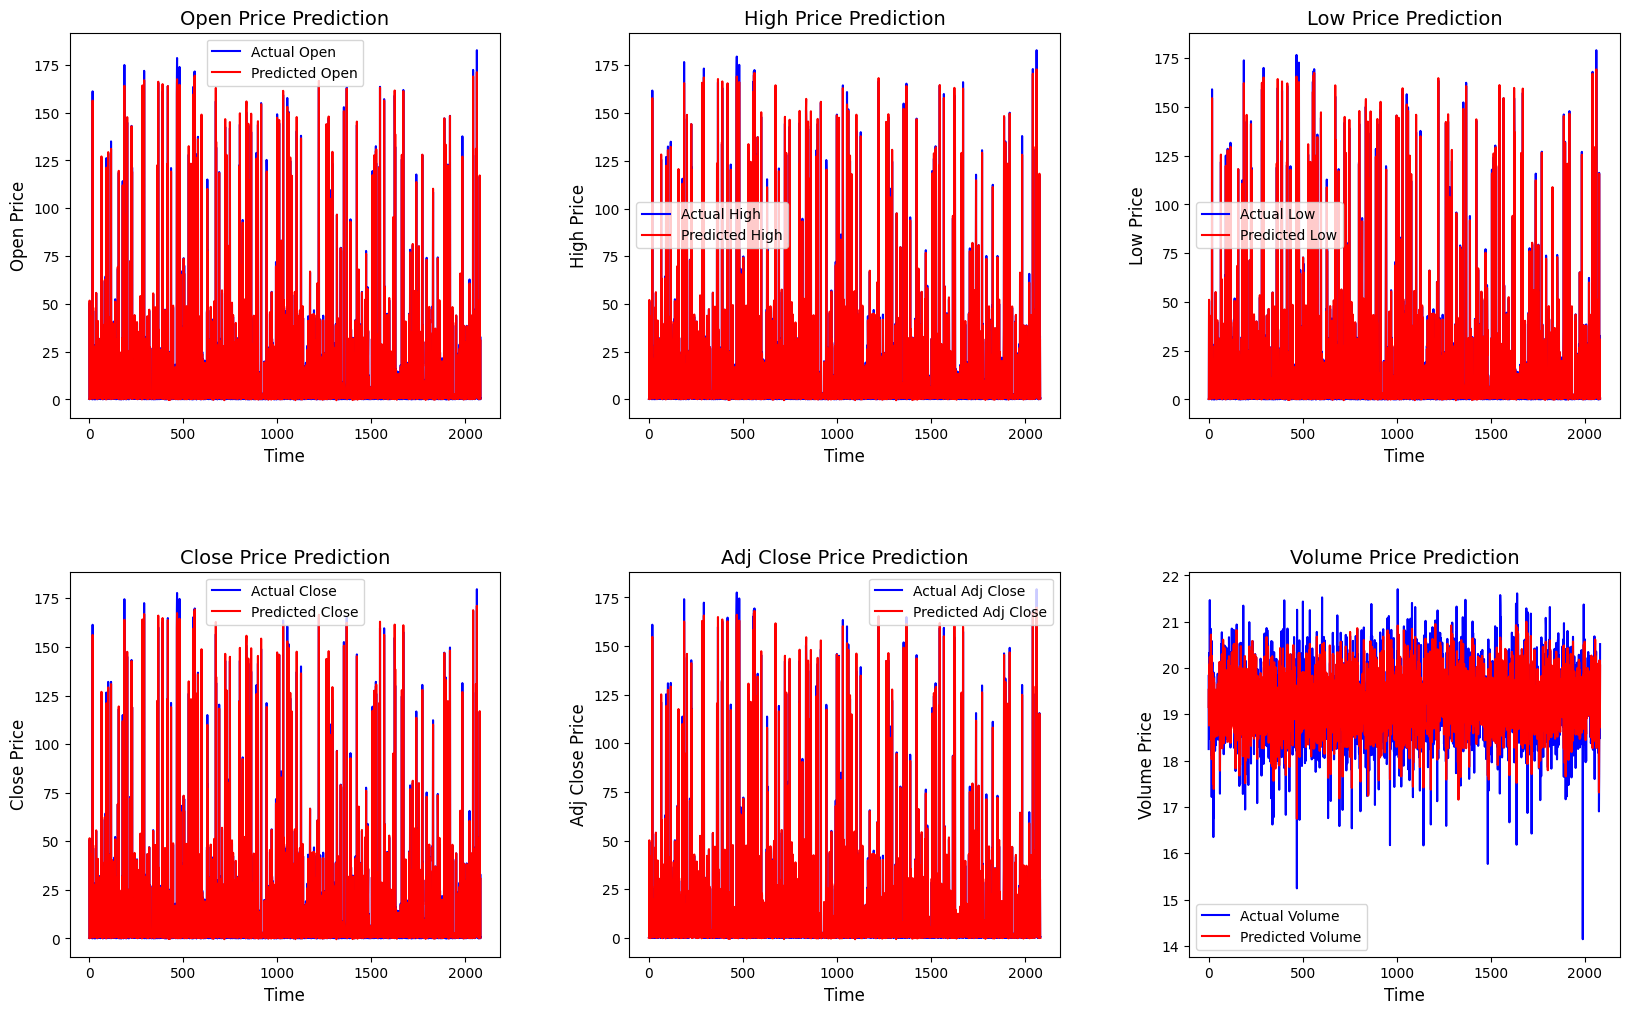

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))   

num_cols = dataset.shape[1]
rows = (num_cols + 2) // 3   

for i, col in enumerate(dataset.columns):
    plt.subplot(rows, 3, i + 1)  
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'{col} Price', fontsize=12)
    plt.legend(fontsize=10)

plt.subplots_adjust(hspace=0.4, wspace=0.3) 
plt.show()
